# 1- Importation des librairies et du dataset

In [41]:
#importer les librairies
import pandas as pd
import numpy as np
import matplotlib as plt

# 2- Importation du dataset train, dictionnaire valeurs manquante, indexation et renommer le dataset

In [9]:
#impoter le dataset train en créant un dictionnaire de valeurs manquantes
missing_values = ["n/a", "na", "--","NaN","nan","N/A"]
train = pd.read_csv('train.csv', na_values = missing_values)
#renommer la colonne Unnamed en index
train.rename(columns={'Unnamed: 0': 'index'}, inplace =True)
#indexer la colonne index
train.set_index('index',inplace=True)

# 3- Visualisation du head

In [10]:
#afficher les 3 premieres lignes du train
train.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,status_matrimonial,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
index,,,,,,,,,,,,,,,,,,,,,
942,no checking,18,critical/other existing credit,radio/tv,1169,no known savings,1<=X<4,4,male,single,...,life insurance,29,none,own,2,skilled,1,yes,yes,good
202,no checking,9,existing paid,furniture/equipment,1980,<100,<1,2,female,div/dep/mar,...,car,19,none,rent,2,skilled,1,none,yes,bad
141,0<=X<200,12,existing paid,furniture/equipment,3017,<100,<1,3,female,div/dep/mar,...,real estate,34,none,rent,1,high qualif/self emp/mgmt,1,none,yes,good


# 4- Split du dataset en cat et num et affichage des nouveaux dataframes créés

Ici, on fait un split à la main des variables catégorielles et numériques. Après avoir obtenu les deux listes cat et num, on fait de ces listes des nouvelles dataframes qu'on utilisera plus tard

In [11]:
#liste des variables catégorielles et numériques
#création de deux nouveaux dataframe cat et num

cat = train[['checking_status','employment','credit_history','purpose','savings_status','sex','status_matrimonial','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']]
num = train[['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']]

In [12]:
cat

,checking_status,employment,credit_history,purpose,savings_status,sex,status_matrimonial,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
index,,,,,,,,,,,,,,,
942,no checking,1<=X<4,critical/other existing credit,radio/tv,no known savings,male,single,none,life insurance,none,own,skilled,yes,yes,good
202,no checking,<1,existing paid,furniture/equipment,<100,female,div/dep/mar,co applicant,car,none,rent,skilled,none,yes,bad
141,0<=X<200,<1,existing paid,furniture/equipment,<100,female,div/dep/mar,none,real estate,none,rent,high qualif/self emp/mgmt,none,yes,good
66,<0,>=7,existing paid,new car,no known savings,female,div/dep/mar,none,car,bank,own,skilled,none,yes,bad
370,0<=X<200,>=7,existing paid,business,500<=X<1000,male,mar/wid,none,real estate,none,own,skilled,yes,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,<0,>=7,existing paid,radio/tv,<100,male,single,none,real estate,stores,own,unskilled resident,none,yes,bad
967,no checking,1<=X<4,existing paid,new car,<100,male,single,none,real estate,none,own,unskilled resident,none,no,good
894,<0,4<=X<7,critical/other existing credit,used car,<100,male,single,none,car,none,own,skilled,yes,yes,bad


In [13]:
num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
index,,,,,,,
942,18,1169,4,3,29,2,1
202,9,1980,2,2,19,2,1
141,12,3017,3,1,34,1,1
66,24,915,4,2,29,1,1
370,14,1410,1,2,35,1,1
...,...,...,...,...,...,...,...
913,12,709,4,4,57,1,1
967,10,1546,3,2,31,1,2
894,36,9629,4,4,24,2,1


# 5- Visualisation des valeurs manquantes dans cat puis dans num 

Dans un premier temps nous visualisera s'il y a des valeurs manquantes dans le cat et le num, c'est variables manquantes sont généralement détectées par NaN.

Visualisons les

In [14]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 942 to 735
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_status      800 non-null    object
 1   employment           800 non-null    object
 2   credit_history       800 non-null    object
 3   purpose              800 non-null    object
 4   savings_status       800 non-null    object
 5   sex                  800 non-null    object
 6   status_matrimonial   800 non-null    object
 7   other_parties        800 non-null    object
 8   property_magnitude   800 non-null    object
 9   other_payment_plans  800 non-null    object
 10  housing              800 non-null    object
 11  job                  800 non-null    object
 12  own_telephone        800 non-null    object
 13  foreign_worker       800 non-null    object
 14  class                800 non-null    object
dtypes: object(15)
memory usage: 100.0+ KB


In [15]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 942 to 735
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   duration                800 non-null    int64
 1   credit_amount           800 non-null    int64
 2   installment_commitment  800 non-null    int64
 3   residence_since         800 non-null    int64
 4   age                     800 non-null    int64
 5   existing_credits        800 non-null    int64
 6   num_dependents          800 non-null    int64
dtypes: int64(7)
memory usage: 50.0 KB


<h3>Etant donne que dans notre dataset nous n'avons pas de valeurs manquantes,cela n'empêche pas que nous devons mettre en place une strategie au cas ou on rencontrerait un cas pareil plus tard</h3>

# 6- Imputation des variables manquantes numériques

Ici on va remplacer les variables manquantes par la mediane de la colonne ou se trouve cette valeur manquante

In [16]:
#imputation variables numériques

num['duration'].fillna((num['duration'].median()), inplace = True)
num['credit_amount'].dropna(inplace = True)
num['installment_commitment'].fillna((num['installment_commitment'].mean()), inplace = True)
num['residence_since'].fillna((num['residence_since'].median()), inplace = True)
num['age'].fillna((num['age'].median()), inplace = True)
num['existing_credits'].fillna((num['existing_credits'].median()), inplace = True)
num['num_dependents'].fillna((num['num_dependents'].median()), inplace = True)



C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# 7- Imputation des variables manquantes catégorielles

Ici, on va remplacer le variable catégorielle manquante par la variable qui apparait le plus dans la colonne contenant la variable manquante.

Les types de variables manquantes prises en compte sont lister dans la bibliothèque créée "missing_values" présente dans le 2- 

In [17]:
#imputation variables catégorielles
cat['credit_history'].fillna((cat['credit_history'].mode()), inplace =True)
cat['checking_status'].fillna((cat['checking_status'].mode()), inplace =True)
cat['employment'].fillna((cat['employment'].mode()), inplace =True)
cat['purpose'].fillna((cat['purpose'].mode()), inplace =True)
cat['savings_status'].fillna((cat['savings_status'].mode()), inplace =True)
cat['sex'].fillna((cat['sex'].mode()), inplace =True)
cat['status_matrimonial'].fillna((cat['status_matrimonial'].mode()), inplace =True)
cat['other_parties'].fillna((cat['other_parties'].mode()), inplace =True)
cat['property_magnitude'].fillna((cat['property_magnitude'].mode()), inplace =True)
cat['other_payment_plans'].fillna((cat['other_payment_plans'].mode()), inplace =True)
cat['housing'].fillna((cat['housing'].mode()), inplace =True)
cat['job'].fillna((cat['job'].mode()), inplace =True)
cat['own_telephone'].fillna((cat['own_telephone'].mode()), inplace =True)
cat['foreign_worker'].fillna((cat['foreign_worker'].mode()), inplace =True)



# 8- Détection des valeurs aberrantes(outliers)


Pour visualiser les valeurs aberrantes plus facilement, nous allons utiliser les boxplot.
Sur les boxplot, les valeurs qui sont tellement eloignées des autres valeurs du même domaine sont appelées valeurs aberrantes.

Sans tarder observons ces valeurs aberrantes

<AxesSubplot:>

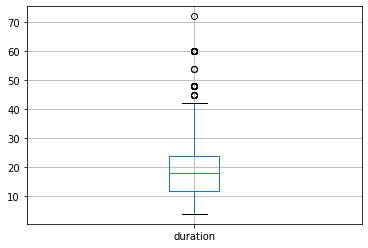

In [18]:
num.boxplot(column='duration')

<AxesSubplot:>

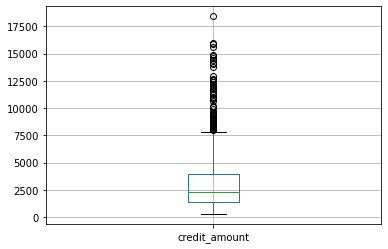

In [19]:
num.boxplot(column='credit_amount')

<AxesSubplot:>

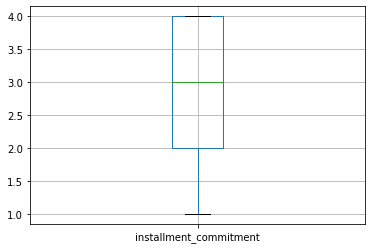

In [20]:
num.boxplot(column='installment_commitment')

<AxesSubplot:>

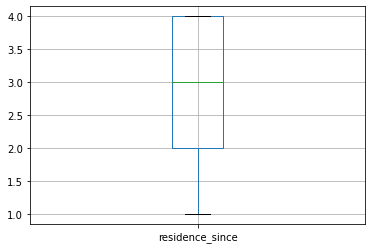

In [21]:
num.boxplot(column='residence_since')

<AxesSubplot:>

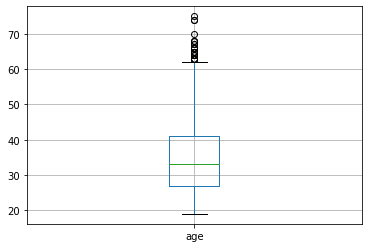

In [22]:
num.boxplot(column='age')

<AxesSubplot:>

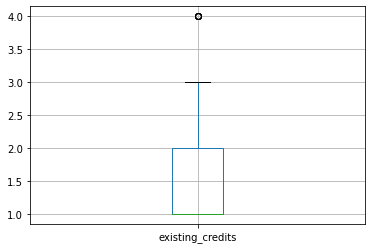

In [23]:
num.boxplot(column='existing_credits')

<AxesSubplot:>

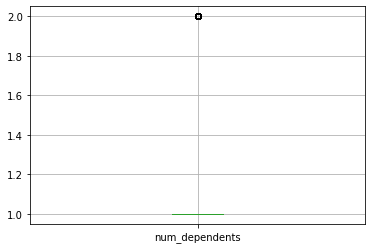

In [24]:
num.boxplot(column='num_dependents')

<h3> Après la visualisation des valeurs aberrantes de chaques variables numériques, nous devons étudier la necessité de traiter ces valeurs aberrantes </h3>

- Nous allons traiter la variable 'age'.

- Nous n'allons pas traiter les valeurs éloignées présentées par le boxplot de 'credit_amount'comme aberrantes car il s'agit ici d'une variable très importante et la supprimer ou la remplacer fausserais le modèle lors de l'apprentissage

- Nous n'allons pas traiter les valeurs présentées dans existing_credits comme aberrantes car nous n'avons qu'une très petite quantité de valeurs aberrantes présentes donc elles ne pourront pas impacter significativement le modèle

- Nous allons traiter les valeurs présentées dans "duration" comme aberrante

- Les autres variables illustrées dans les boxplot plus haut ne seront pas traitées car elles ne comportent pas de valeurs aberrantes

# 9- Traitement des valeurs aberrantes

Ici nous allons traiter les valeurs aberrantes de la variable 'age', 'duration', 'credit_amount' en les supprimant grâce à l'écart IQR


In [27]:
#On supprime les valeurs aberrantes pour la colonne âge

#On calcule Q1

q1=num["age"].quantile(q=0.25)

#On calcule Q3

q3=num["age"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

num= num[num["age"]<borne_sup]
num=num[num["age"]>borne_inf]

<AxesSubplot:>

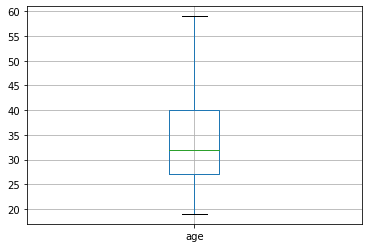

In [28]:
num.boxplot(column='age')

In [29]:
#On supprime les valeurs aberrantes pour la colonne duration

#On calcule Q1

q1=num["duration"].quantile(q=0.25)

#On calcule Q3

q3=num["duration"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

num= num[num["duration"]<borne_sup]
num=num[num["duration"]>borne_inf]

<AxesSubplot:>

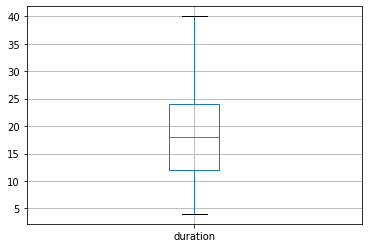

In [30]:
num.boxplot(column='duration')

In [31]:
num.shape

(702, 7)

<h3>
    Après avoir supprimé les valeurs aberrantes numériques, nous nous rendons compte que notre dataset a diminué en valeurs, il est quitté de 800 lignes à 702 lignes. Et ainsi nous pouvons passer à l'étape suivante qui consiste à mettre les variables numériques à la même échelle (normalisation ou standardisation des données)
</h3>

# 10- Verification de la normalité des données et choix de l'approche


Avant de choisir l'une des deux approches, nous devons d'abord vérifier la normalité des données. Car, pour des données suivant une loi normale, on applique la normalisation et au cas contraire c'est la standardisation qui est à utiliser.
Pour la vérification, observons les différents histogrammes et analysons pour tirer une conclusion.

In [32]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 942 to 735
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   duration                702 non-null    int64
 1   credit_amount           702 non-null    int64
 2   installment_commitment  702 non-null    int64
 3   residence_since         702 non-null    int64
 4   age                     702 non-null    int64
 5   existing_credits        702 non-null    int64
 6   num_dependents          702 non-null    int64
dtypes: int64(7)
memory usage: 43.9 KB


<h3>Grâce à pandas-profiling nous pouvons visualiser les différents histogrammes pour notre analyse</h3>

In [ ]:
prof = ProfileReport(num)
prof.to_file(output_file='rapport_num.html')

<h3> Après l'analyse des différents histogrammes, nous pouvons dire que ces variables suivent une loie normale et par conséquent on utilisera la standardisation à la place de la normalisation</h3>

# 11- standardisation(score Z) des variables numériques

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(num)
row = scaler.transform(num)
row = pd.DataFrame(row, index=num.index, columns = num.columns)

In [36]:
row

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
index,,,,,,,
942,-0.062240,-0.719668,0.916727,0.180853,-0.538934,1.000541,-0.433379
202,-1.070525,-0.382279,-0.893518,-0.732519,-1.648086,1.000541,-0.433379
141,-0.734430,0.049129,0.011604,-1.645890,0.015642,-0.720978,-0.433379
66,0.609950,-0.825336,0.916727,-0.732519,-0.538934,-0.720978,-0.433379
370,-0.510367,-0.619408,-1.798641,-0.732519,0.126557,-0.720978,-0.433379
...,...,...,...,...,...,...,...
913,-0.734430,-0.911035,0.916727,1.094224,2.566692,-0.720978,-0.433379
967,-0.958494,-0.562830,0.011604,-0.732519,-0.317104,-0.720978,2.307450
894,1.954331,2.799824,0.916727,1.094224,-1.093510,1.000541,-0.433379


In [37]:
#nise à jour de num 
num = row

In [40]:
#on affiche le dataframe num
num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
index,,,,,,,
942,-0.062240,-0.719668,0.916727,0.180853,-0.538934,1.000541,-0.433379
202,-1.070525,-0.382279,-0.893518,-0.732519,-1.648086,1.000541,-0.433379
141,-0.734430,0.049129,0.011604,-1.645890,0.015642,-0.720978,-0.433379
66,0.609950,-0.825336,0.916727,-0.732519,-0.538934,-0.720978,-0.433379
370,-0.510367,-0.619408,-1.798641,-0.732519,0.126557,-0.720978,-0.433379
...,...,...,...,...,...,...,...
913,-0.734430,-0.911035,0.916727,1.094224,2.566692,-0.720978,-0.433379
967,-0.958494,-0.562830,0.011604,-0.732519,-0.317104,-0.720978,2.307450
894,1.954331,2.799824,0.916727,1.094224,-1.093510,1.000541,-0.433379
